In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
BASE_DIR = '../../Data/S_Data'
geolocation_path = os.path.join(BASE_DIR, 'geolocation.csv')
order_items_path = os.path.join(BASE_DIR, 'order_items.csv')
order_payments_path = os.path.join(BASE_DIR, 'order_payments.csv')
order_reviews_path = os.path.join(BASE_DIR, 'order_reviews.csv')
orders_path = os.path.join(BASE_DIR, 'orders.csv')
products_path = os.path.join(BASE_DIR, 'products.csv')
sellers_path = os.path.join(BASE_DIR, 'sellers.csv')

In [3]:
order_items_df = pd.read_csv(order_items_path) # ../../Data/S_Data/order_items.csv
orders_df = pd.read_csv(orders_path)

------------------------------------------------------

In [6]:
merged_df = pd.merge(order_items_df, orders_df, how='left', on='order_id')

merged_df = merged_df.set_index('order_purchase_timestamp')
merged_df.index = pd.to_datetime(merged_df.index.str[:10])
merged_df.index.name = 'date'
merged_df['items'] = merged_df.groupby('order_id')['order_item_id'].transform('count')
merged_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,items
date,,,,,,,,,,,,,,
2017-09-13,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1
2017-04-26,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1


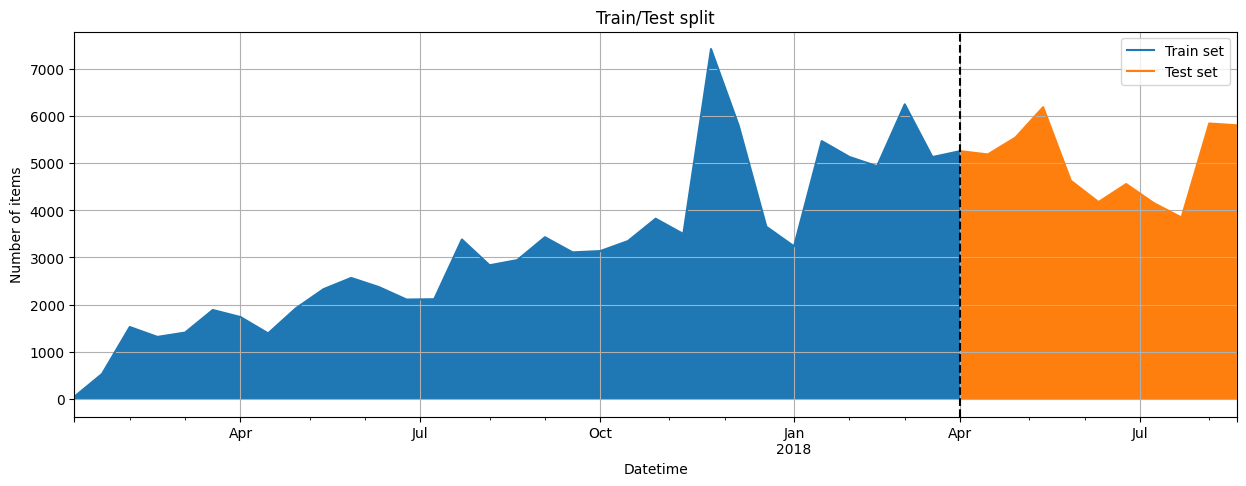

In [20]:
weekly_items_df = merged_df.resample('2W').sum()[['items']]
weekly_items_df = weekly_items_df.loc[weekly_items_df.index >= '2017-01-01']
weekly_items_df = weekly_items_df.loc[weekly_items_df.index <= '2018-09-01']

fig, ax = plt.subplots(sharex=True, figsize=(15, 5))
train = weekly_items_df.loc[weekly_items_df.index <= '2018-04-01']
test = weekly_items_df.loc[weekly_items_df.index >= '2018-04-01']
train.plot(ax=ax)
test.plot(ax=ax)
ax.fill_between(train.index, train['items'])
ax.fill_between(test.index, test['items'])
ax.axvline('2018-04-01', ls='--', color='black')
plt.legend(['Train set', 'Test set'])
plt.title('Train/Test split')
plt.ylabel('Number of items')
plt.xlabel('Datetime')
plt.grid(True)
plt.show()